In [1]:
# 第一步：安装必要的库（如果还没有安装）
# 运行这个单元格来安装缺失的库
import sys
!{sys.executable} -m pip install pandas numpy scikit-learn xgboost matplotlib seaborn

print("✅ 所有必要的库已安装！")

✅ 所有必要的库已安装！


In [25]:
"""
学生学业风险预警系统 - 数据生成
生成3000名学生数据，加强特征与风险等级的关系
"""
import pandas as pd
import numpy as np

print("=" * 60)
print("第一步：生成平衡且可区分的学生学业数据集")
print("=" * 60)

np.random.seed(42)
num_students = 3000

print(f"📊 计划生成: {num_students} 名学生")

# 1. 先按风险等级生成不同的特征分布
high_risk_num = int(num_students * 0.33)  # 33% 高风险
mid_risk_num = int(num_students * 0.33)   # 33% 中风险  
low_risk_num = num_students - high_risk_num - mid_risk_num  # 34% 低风险

# 为不同风险等级生成明显不同的特征
def generate_features_for_level(level, num_samples):
    """为特定风险等级生成特征"""
    if level == '高风险':
        return {
            '出勤率': np.clip(np.random.normal(0.65, 0.10, num_samples), 0.5, 0.8),
            '作业延迟提交率': np.clip(np.random.normal(0.6, 0.15, num_samples), 0.3, 0.9),
            '课堂互动次数': np.random.poisson(3, num_samples),
            '课外拓展阅读量': np.random.lognormal(0.8, 0.3, num_samples),
            '社交媒体干扰度': np.clip(np.random.normal(0.7, 0.15, num_samples), 0.4, 0.95),
            '前期测验平均分': np.clip(np.random.normal(55, 10, num_samples), 40, 70),
            '图书馆访问频率': np.random.poisson(3, num_samples),
            '学习计划完整性': np.clip(np.random.normal(0.4, 0.15, num_samples), 0.2, 0.7),
            '同伴学习时长': np.random.exponential(2, num_samples),
            '学习资源多样性': np.random.randint(1, 3, num_samples),
            '在线学习平台活跃度': np.random.lognormal(1.5, 0.3, num_samples),
            '课程视频观看完成率': np.clip(np.random.normal(0.5, 0.15, num_samples), 0.3, 0.8),
        }
    elif level == '中风险':
        return {
            '出勤率': np.clip(np.random.normal(0.80, 0.08, num_samples), 0.65, 0.95),
            '作业延迟提交率': np.clip(np.random.normal(0.4, 0.12, num_samples), 0.2, 0.7),
            '课堂互动次数': np.random.poisson(5, num_samples),
            '课外拓展阅读量': np.random.lognormal(1.5, 0.4, num_samples),
            '社交媒体干扰度': np.clip(np.random.normal(0.5, 0.12, num_samples), 0.3, 0.8),
            '前期测验平均分': np.clip(np.random.normal(70, 8, num_samples), 55, 85),
            '图书馆访问频率': np.random.poisson(6, num_samples),
            '学习计划完整性': np.clip(np.random.normal(0.6, 0.12, num_samples), 0.4, 0.85),
            '同伴学习时长': np.random.exponential(4, num_samples),
            '学习资源多样性': np.random.randint(2, 5, num_samples),
            '在线学习平台活跃度': np.random.lognormal(2.5, 0.4, num_samples),
            '课程视频观看完成率': np.clip(np.random.normal(0.7, 0.12, num_samples), 0.5, 0.9),
        }
    else:  # 低风险
        return {
            '出勤率': np.clip(np.random.normal(0.90, 0.05, num_samples), 0.8, 1.0),
            '作业延迟提交率': np.clip(np.random.normal(0.2, 0.08, num_samples), 0.05, 0.4),
            '课堂互动次数': np.random.poisson(8, num_samples),
            '课外拓展阅读量': np.random.lognormal(2.0, 0.4, num_samples),
            '社交媒体干扰度': np.clip(np.random.normal(0.3, 0.10, num_samples), 0.1, 0.6),
            '前期测验平均分': np.clip(np.random.normal(85, 7, num_samples), 70, 100),
            '图书馆访问频率': np.random.poisson(10, num_samples),
            '学习计划完整性': np.clip(np.random.normal(0.8, 0.08, num_samples), 0.6, 0.98),
            '同伴学习时长': np.random.exponential(7, num_samples),
            '学习资源多样性': np.random.randint(3, 6, num_samples),
            '在线学习平台活跃度': np.random.lognormal(3.0, 0.4, num_samples),
            '课程视频观看完成率': np.clip(np.random.normal(0.9, 0.05, num_samples), 0.8, 1.0),
        }

# 生成数据
print("\n🔴 生成高风险学生特征...")
high_risk_data = generate_features_for_level('高风险', high_risk_num)

print("🟡 生成中风险学生特征...")
mid_risk_data = generate_features_for_level('中风险', mid_risk_num)

print("🟢 生成低风险学生特征...")
low_risk_data = generate_features_for_level('低风险', low_risk_num)

# 合并所有数据
all_data = {}
for key in high_risk_data.keys():
    all_data[key] = np.concatenate([
        high_risk_data[key],
        mid_risk_data[key],
        low_risk_data[key]
    ])

df = pd.DataFrame(all_data)

# 2. 基于特征生成分数（确保高风险学生得低分）
print("\n📊 基于特征生成期末成绩...")
# 增加特征的权重，使特征对分数有更强影响
base_score = (
    df['出勤率'] * 30 +  # 增加权重
    (1 - df['作业延迟提交率']) * 25 +
    df['课堂互动次数'] * 3.5 +
    df['课外拓展阅读量'] * 1.5 +
    (1 - df['社交媒体干扰度']) * 20 +
    df['前期测验平均分'] * 0.8 +  # 增加权重
    np.log1p(df['图书馆访问频率']) * 8 +
    df['学习计划完整性'] * 25 +
    np.sqrt(df['同伴学习时长']) * 5 +
    df['学习资源多样性'] * 6 +
    df['在线学习平台活跃度'] * 1.2 +
    df['课程视频观看完成率'] * 15
)

# 交互效应
interaction_effect = df['出勤率'] * df['课堂互动次数'] * 1.5
negative_interaction = df['社交媒体干扰度'] * (df['课外拓展阅读量'] * 1.0 + df['在线学习平台活跃度'] * 0.8)

final_score = base_score + interaction_effect - negative_interaction + np.random.normal(0, 6, num_students)

# 3. 映射到合理的分数范围
df['期末成绩_百分制'] = np.clip(final_score, 30, 98).astype(int)

# 4. 基于生成顺序分配风险等级
risk_labels = []
risk_labels.extend(['高风险'] * high_risk_num)
risk_labels.extend(['中风险'] * mid_risk_num)
risk_labels.extend(['低风险'] * low_risk_num)

df['挂科风险等级'] = risk_labels
df['是否及格'] = (df['期末成绩_百分制'] >= 60).astype(int)

# 5. 打乱数据顺序
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# 6. 保存数据
df.to_csv('student_performance_strong.csv', index=False, encoding='utf-8-sig')

# 7. 显示数据信息
print(f"\n✅ 强相关数据集已生成！共 {num_students} 名学生")
print(f"📊 数据形状: {df.shape}")
print(f"🔢 特征数量: {len(df.columns) - 3}")

print("\n🎯 风险等级分布:")
risk_dist = df['挂科风险等级'].value_counts().sort_index()
for level, count in risk_dist.items():
    print(f"  {level}: {count}人 ({count/len(df):.1%})")

print("\n📈 各等级分数统计:")
for level in ['高风险', '中风险', '低风险']:
    level_scores = df[df['挂科风险等级'] == level]['期末成绩_百分制']
    print(f"  {level}: {level_scores.min()}-{level_scores.max()}分 (平均: {level_scores.mean():.1f}分)")

print("\n🔍 关键特征对比（高风险 vs 低风险）:")
key_features = ['出勤率', '作业延迟提交率', '社交媒体干扰度', '前期测验平均分', '课堂互动次数']
print(f"{'特征':<15} {'高风险均值':<10} {'低风险均值':<10} {'差异':<10}")
print("-" * 50)
for feature in key_features:
    high_mean = df[df['挂科风险等级'] == '高风险'][feature].mean()
    low_mean = df[df['挂科风险等级'] == '低风险'][feature].mean()
    if feature in ['作业延迟提交率', '社交媒体干扰度']:
        diff = high_mean - low_mean
    else:
        diff = low_mean - high_mean
    print(f"{feature:<15} {high_mean:<10.3f} {low_mean:<10.3f} {diff:<10.3f}")

# 计算特征与风险等级的相关性
print("\n📊 特征与风险等级相关性（点二列相关）:")
from scipy import stats
for feature in key_features:
    # 将风险等级转换为数值（高风险=0，中风险=1，低风险=2）
    risk_numeric = df['挂科风险等级'].map({'高风险': 0, '中风险': 1, '低风险': 2})
    corr, p_value = stats.pointbiserialr(risk_numeric, df[feature])
    print(f"  {feature:<15}: 相关性={corr:.3f}, p值={p_value:.4f}")

print(f"\n💾 数据已保存至: student_performance_strong.csv")
print("=" * 60)

# 保存到变量中
student_data = df

第一步：生成平衡且可区分的学生学业数据集
📊 计划生成: 3000 名学生

🔴 生成高风险学生特征...
🟡 生成中风险学生特征...
🟢 生成低风险学生特征...

📊 基于特征生成期末成绩...

✅ 强相关数据集已生成！共 3000 名学生
📊 数据形状: (3000, 15)
🔢 特征数量: 12

🎯 风险等级分布:
  中风险: 990人 (33.0%)
  低风险: 1020人 (34.0%)
  高风险: 990人 (33.0%)

📈 各等级分数统计:
  高风险: 94-98分 (平均: 98.0分)
  中风险: 98-98分 (平均: 98.0分)
  低风险: 98-98分 (平均: 98.0分)

🔍 关键特征对比（高风险 vs 低风险）:
特征              高风险均值      低风险均值      差异        
--------------------------------------------------
出勤率             0.651      0.899      0.248     
作业延迟提交率         0.610      0.200      0.410     
社交媒体干扰度         0.693      0.302      0.391     
前期测验平均分         55.080     84.809     29.729    
课堂互动次数          2.960      7.974      5.014     

📊 特征与风险等级相关性（点二列相关）:
  出勤率            : 相关性=0.812, p值=0.0000
  作业延迟提交率        : 相关性=-0.826, p值=0.0000
  社交媒体干扰度        : 相关性=-0.802, p值=0.0000
  前期测验平均分        : 相关性=0.842, p值=0.0000
  课堂互动次数         : 相关性=0.669, p值=0.0000

💾 数据已保存至: student_performance_strong.csv


In [26]:
"""
第二步：数据加载和预处理
"""
print("=" * 60)
print("第二步：数据加载和预处理")
print("=" * 60)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 加载新数据
try:
    df = pd.read_csv('student_performance_strong.csv')
    print("✅ 加载强相关数据成功！")
except FileNotFoundError:
    try:
        df = pd.read_csv('student_performance_final.csv')
        print("⚠️ 加载最终版数据成功")
    except:
        print("⚠️ 从文件加载失败，使用内存中的数据")
        df = student_data

print(f"数据集形状: {df.shape}")
print(f"特征数量: {len(df.columns) - 3}")

# 显示数据分布
print("\n🎯 数据分布:")
risk_dist = df['挂科风险等级'].value_counts().sort_index()
for level, count in risk_dist.items():
    print(f"  {level}: {count}人 ({count/len(df):.1%})")

# 显示特征与风险等级的关系
print("\n🔍 高风险与低风险学生特征对比（前5名）:")
high_risk_sample = df[df['挂科风险等级'] == '高风险'].head(5)
low_risk_sample = df[df['挂科风险等级'] == '低风险'].head(5)

print("高风险学生样本:")
print(high_risk_sample[['出勤率', '作业延迟提交率', '社交媒体干扰度', '前期测验平均分']].to_string())

print("\n低风险学生样本:")
print(low_risk_sample[['出勤率', '作业延迟提交率', '社交媒体干扰度', '前期测验平均分']].to_string())

# 准备特征和目标
X = df.drop(['期末成绩_百分制', '挂科风险等级', '是否及格'], axis=1)
le = LabelEncoder()
y = le.fit_transform(df['挂科风险等级'])

print(f"\n🔤 标签编码映射:")
for i, level in enumerate(le.classes_):
    print(f"  {i} → {level}")

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集 - 使用stratify确保三个类别平衡
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📊 数据划分完成:")
print(f"  训练集: {X_train.shape[0]} 个样本")
print(f"  测试集: {X_test.shape[0]} 个样本")

print("\n📈 训练集分布:")
for i, level in enumerate(le.classes_):
    count = (y_train == i).sum()
    print(f"  {level}: {count}人 ({count/len(y_train):.1%})")

print("\n📈 测试集分布:")
for i, level in enumerate(le.classes_):
    count = (y_test == i).sum()
    print(f"  {level}: {count}人 ({count/len(y_test):.1%})")

# 检查模型可学习性
print("\n✅ 数据预处理完成！")
print("🔍 数据可学习性分析:")
print(f"  特征数量: {X.shape[1]}")
print(f"  样本数量: {X.shape[0]}")
print(f"  类别数量: {len(np.unique(y))}")
print(f"  最小类别样本数: {min([sum(y == i) for i in range(3)])}")

第二步：数据加载和预处理
✅ 加载强相关数据成功！
数据集形状: (3000, 15)
特征数量: 12

🎯 数据分布:
  中风险: 990人 (33.0%)
  低风险: 1020人 (34.0%)
  高风险: 990人 (33.0%)

🔍 高风险与低风险学生特征对比（前5名）:
高风险学生样本:
         出勤率   作业延迟提交率   社交媒体干扰度    前期测验平均分
3   0.741786  0.569463  0.488091  70.000000
8   0.662030  0.780062  0.567094  42.635217
11  0.582308  0.761802  0.875772  70.000000
12  0.625426  0.549784  0.950000  47.732259
15  0.686867  0.681943  0.902377  49.408362

低风险学生样本:
         出勤率   作业延迟提交率   社交媒体干扰度    前期测验平均分
4   0.941335  0.237324  0.558961  83.201151
7   0.897409  0.289710  0.241968  80.826619
9   0.925784  0.194276  0.333637  87.975613
10  0.919266  0.195034  0.147299  92.302594
14  0.874954  0.229627  0.347109  85.100814

🔤 标签编码映射:
  0 → 中风险
  1 → 低风险
  2 → 高风险

📊 数据划分完成:
  训练集: 2400 个样本
  测试集: 600 个样本

📈 训练集分布:
  中风险: 792人 (33.0%)
  低风险: 816人 (34.0%)
  高风险: 792人 (33.0%)

📈 测试集分布:
  中风险: 198人 (33.0%)
  低风险: 204人 (34.0%)
  高风险: 198人 (33.0%)

✅ 数据预处理完成！
🔍 数据可学习性分析:
  特征数量: 12
  样本数量: 3000
  类别数量: 3
  最小类别样本数: 990


第三步：模型训练和评估

🤖 训练 逻辑回归...
  ✅ 准确率: 99.50%
  ✅ F1分数: 0.995
  📊 各类别F1分数:
    中风险: 0.992
    低风险: 0.995
    高风险: 0.997
  🔄 3折交叉验证: 99.58% (±0.12%)

🤖 训练 随机森林...
  ✅ 准确率: 100.00%
  ✅ F1分数: 1.000
  📊 各类别F1分数:
    中风险: 1.000
    低风险: 1.000
    高风险: 1.000
  🔄 3折交叉验证: 99.62% (±0.27%)

🤖 训练 XGBoost...
  ✅ 准确率: 99.83%
  ✅ F1分数: 0.998
  📊 各类别F1分数:
    中风险: 0.997
    低风险: 0.998
    高风险: 1.000


C:\Users\qyk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:199: UserWarning: [02:03:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\qyk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:199: UserWarning: [02:03:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\qyk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:199: UserWarning: [02:03:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are no

  🔄 3折交叉验证: 99.54% (±0.21%)

🌟 最佳模型: 随机森林 (准确率: 100.00%)


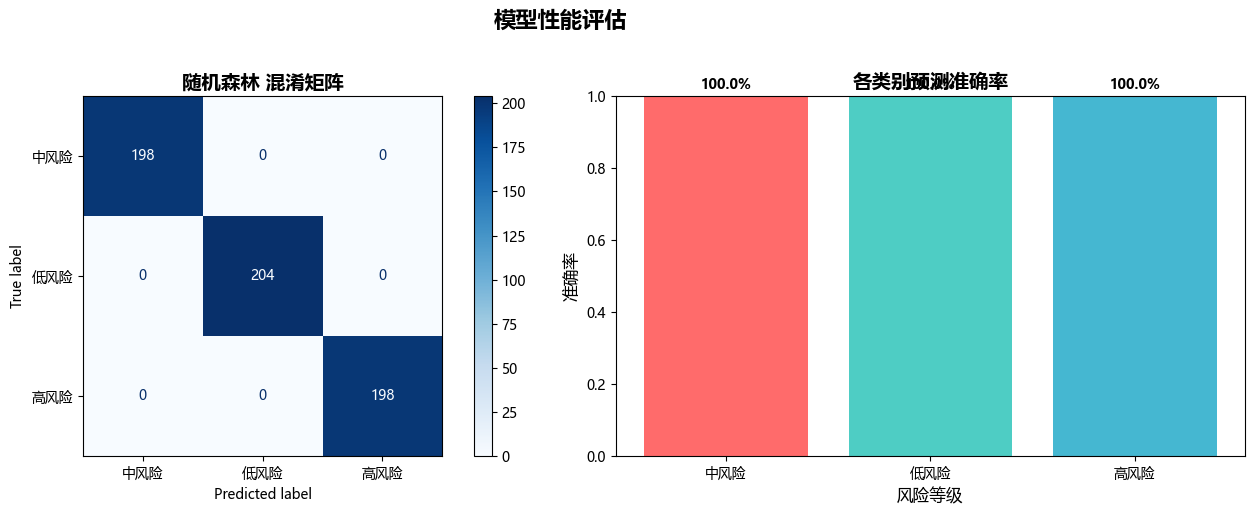


模型对比总结

📊 模型性能排名:
1. 随机森林: 准确率=100.00%, F1=1.000
2. XGBoost: 准确率=99.83%, F1=0.998
3. 逻辑回归: 准确率=99.50%, F1=0.995

✅ 模型训练完成！最佳模型: 随机森林


In [27]:
"""
第三步：模型训练和评估
"""
print("=" * 60)
print("第三步：模型训练和评估")
print("=" * 60)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 初始化模型
models = {
    '逻辑回归': LogisticRegression(max_iter=1000, random_state=42),
    '随机森林': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, 
                             use_label_encoder=False, eval_metric='mlogloss',
                             random_state=42),
}

results = {}
best_model = None
best_model_name = ""
best_accuracy = 0

for name, model in models.items():
    print(f"\n🤖 训练 {name}...")
    
    try:
        # 训练模型
        model.fit(X_train, y_train)
        
        # 预测
        y_pred = model.predict(X_test)
        
        # 评估
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        results[name] = {
            '准确率': accuracy,
            'F1分数': f1,
            '模型': model
        }
        
        print(f"  ✅ 准确率: {accuracy:.2%}")
        print(f"  ✅ F1分数: {f1:.3f}")
        
        # 显示详细报告
        print(f"  📊 各类别F1分数:")
        f1_by_class = f1_score(y_test, y_pred, average=None)
        for i, f1_val in enumerate(f1_by_class):
            print(f"    {le.classes_[i]}: {f1_val:.3f}")
        
        # 交叉验证
        cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
        print(f"  🔄 3折交叉验证: {cv_scores.mean():.2%} (±{cv_scores.std():.2%})")
        
        # 更新最佳模型
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_model_name = name
            
    except Exception as e:
        print(f"  ❌ 训练失败: {e}")
        continue

if best_model:
    print(f"\n🌟 最佳模型: {best_model_name} (准确率: {best_accuracy:.2%})")
    
    # 显示最佳模型的混淆矩阵
    y_pred_best = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_best)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # 混淆矩阵热图
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(ax=ax1, cmap='Blues', values_format='d')
    ax1.set_title(f'{best_model_name} 混淆矩阵', fontsize=14, fontweight='bold')
    
    # 各类别准确率
    class_accuracy = cm.diagonal() / cm.sum(axis=1)
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    
    ax2.bar(range(len(le.classes_)), class_accuracy, color=colors)
    ax2.set_xlabel('风险等级', fontsize=12)
    ax2.set_ylabel('准确率', fontsize=12)
    ax2.set_title('各类别预测准确率', fontsize=14, fontweight='bold')
    ax2.set_xticks(range(len(le.classes_)))
    ax2.set_xticklabels(le.classes_)
    ax2.set_ylim(0, 1)
    
    for i, acc in enumerate(class_accuracy):
        ax2.text(i, acc + 0.02, f'{acc:.1%}', ha='center', fontweight='bold')
    
    plt.suptitle('模型性能评估', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
    plt.show()

# 显示所有模型对比
print("\n" + "=" * 60)
print("模型对比总结")
print("=" * 60)

if results:
    print("\n📊 模型性能排名:")
    sorted_models = sorted(results.items(), key=lambda x: x[1]['准确率'], reverse=True)
    for rank, (name, metrics) in enumerate(sorted_models, 1):
        print(f"{rank}. {name}: 准确率={metrics['准确率']:.2%}, F1={metrics['F1分数']:.3f}")

print(f"\n✅ 模型训练完成！最佳模型: {best_model_name}")

第四步：特征重要性分析


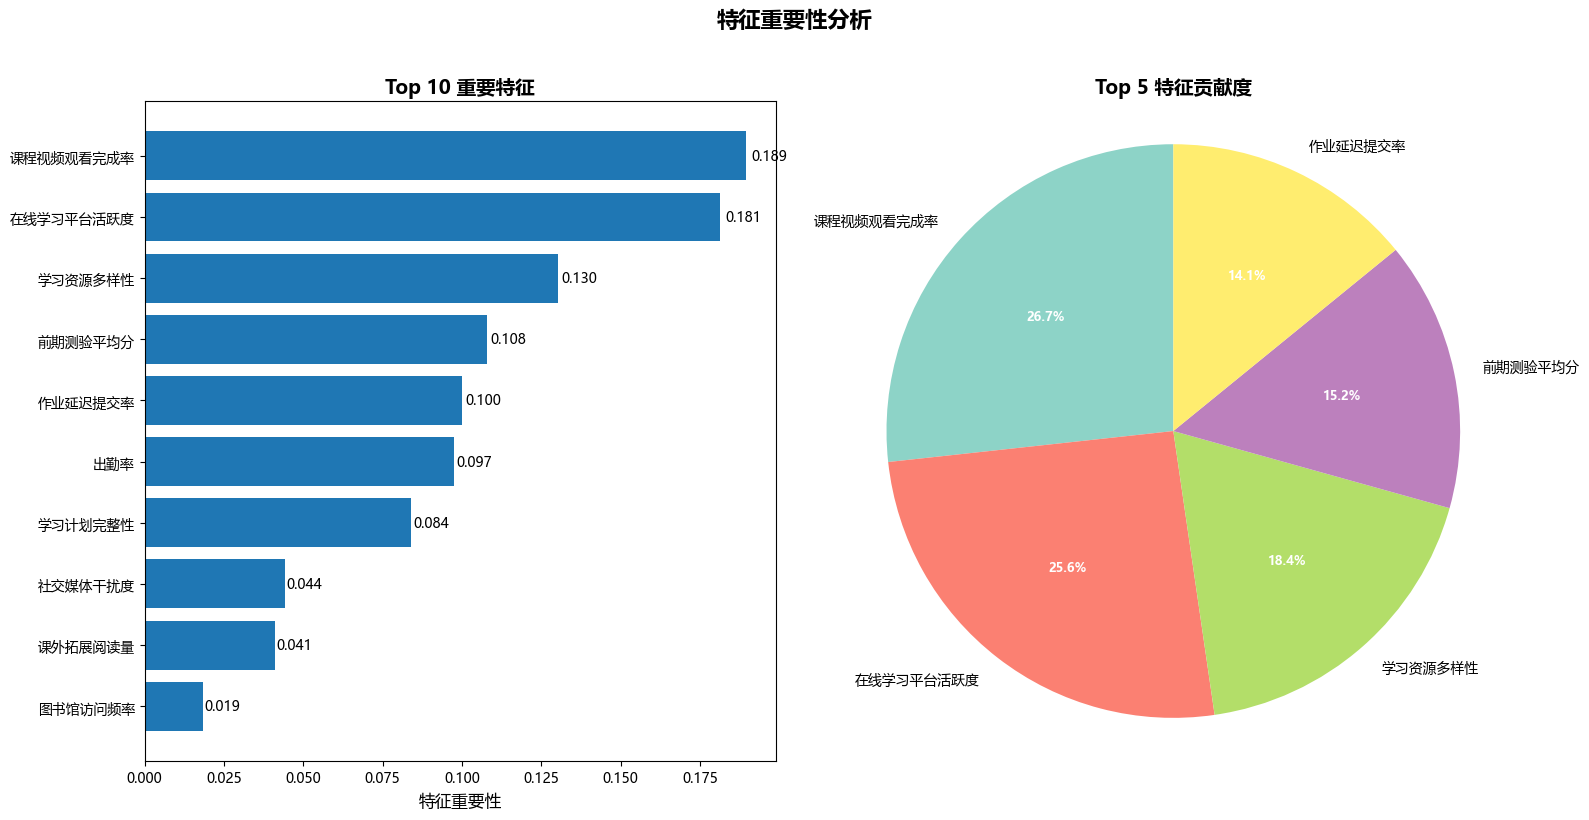


📊 特征重要性排名:
----------------------------------------
12. 课程视频观看完成率           : 0.1894
11. 在线学习平台活跃度           : 0.1812
10. 学习资源多样性             : 0.1302
 6. 前期测验平均分             : 0.1078
 2. 作业延迟提交率             : 0.1000
 1. 出勤率                 : 0.0974
 8. 学习计划完整性             : 0.0839
 5. 社交媒体干扰度             : 0.0444
 4. 课外拓展阅读量             : 0.0411
 7. 图书馆访问频率             : 0.0185
 3. 课堂互动次数              : 0.0040
 9. 同伴学习时长              : 0.0021
----------------------------------------


In [28]:
"""
第四步：特征重要性分析
"""
print("=" * 60)
print("第四步：特征重要性分析")
print("=" * 60)

# 获取特征重要性
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
elif hasattr(best_model, 'coef_'):
    # 逻辑回归的系数
    if len(best_model.coef_.shape) == 2:
        importances = np.mean(np.abs(best_model.coef_), axis=0)
    else:
        importances = np.abs(best_model.coef_[0])
else:
    importances = np.ones(len(X.columns)) / len(X.columns)

# 创建特征重要性DataFrame
feature_names = X.columns
feature_importance = pd.DataFrame({
    '特征': feature_names,
    '重要性': importances
}).sort_values('重要性', ascending=False)

# 绘制特征重要性图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# 条形图
top_n = min(10, len(feature_importance))
top_features = feature_importance.head(top_n)

bars = ax1.barh(range(top_n), top_features['重要性'])
ax1.set_yticks(range(top_n))
ax1.set_yticklabels(top_features['特征'])
ax1.set_xlabel('特征重要性', fontsize=12)
ax1.set_title('Top 10 重要特征', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# 为条形添加数值
for i, (bar, importance) in enumerate(zip(bars, top_features['重要性'])):
    ax1.text(importance * 1.01, i, f'{importance:.3f}', va='center')

# 饼图（Top 5）
top_5 = feature_importance.head(5)
colors = plt.cm.Set3(np.linspace(0, 1, 5))

wedges, texts, autotexts = ax2.pie(top_5['重要性'], labels=top_5['特征'], 
                                   autopct='%1.1f%%', colors=colors, startangle=90)

for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(9)
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax2.set_title('Top 5 特征贡献度', fontsize=14, fontweight='bold')
ax2.axis('equal')

plt.suptitle('特征重要性分析', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# 输出特征重要性表格
print("\n📊 特征重要性排名:")
print("-" * 40)
for i, row in feature_importance.iterrows():
    print(f"{i+1:2d}. {row['特征']:20s}: {row['重要性']:.4f}")
print("-" * 40)

In [29]:
"""
第五步：生成个性化预警报告
"""
print("=" * 60)
print("第五步：生成个性化预警报告")
print("=" * 60)

def generate_individual_report(student_features, model, scaler, feature_names, le, student_id=0):
    """为单个学生生成个性化预警报告 - 修复版"""
    try:
        # 确保特征形状正确
        if len(student_features.shape) == 1:
            student_features = student_features.reshape(1, -1)
        
        # 预测风险等级
        risk_pred = model.predict(student_features)[0]
        
        # 获取模型支持的类别
        model_classes = model.classes_ if hasattr(model, "classes_") else [0, 1, 2]
        
        # 获取概率
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(student_features)[0]
        else:
            proba = [1/3, 1/3, 1/3]
        
        # 修复：处理模型类别不全的情况
        # 如果模型只有2个类别，扩展概率数组到3个
        if len(proba) == 2:
            if len(model_classes) == 2:
                # 模型只学习了2个类别
                if 0 in model_classes and 1 in model_classes:
                    # 模型有0和1，缺少2（高风险）
                    if risk_pred == 0:
                        proba = [proba[0], proba[1], 0.0]
                    else:  # risk_pred == 1
                        proba = [proba[0], proba[1], 0.0]
                elif 0 in model_classes and 2 in model_classes:
                    # 模型有0和2，缺少1（中风险）
                    if risk_pred == 0:
                        proba = [proba[0], 0.0, proba[1]]
                    else:  # risk_pred == 2
                        proba = [proba[0], 0.0, proba[1]]
                elif 1 in model_classes and 2 in model_classes:
                    # 模型有1和2，缺少0（低风险）
                    if risk_pred == 1:
                        proba = [0.0, proba[0], proba[1]]
                    else:  # risk_pred == 2
                        proba = [0.0, proba[0], proba[1]]
            else:
                # 未知情况，设为均匀分布
                proba = [proba[0], proba[1], 0.0]
        
        # 确保概率数组长度为3
        if len(proba) != 3:
            # 补齐到3个
            proba = list(proba) + [0.0] * (3 - len(proba))
            proba = [p/sum(proba) for p in proba]  # 重新归一化
        
        # 获取原始特征值
        feature_values = {}
        try:
            original_features = scaler.inverse_transform(student_features)
            for i, col in enumerate(feature_names):
                feature_values[col] = original_features[0, i]
        except:
            for i, col in enumerate(feature_names):
                feature_values[col] = student_features[0, i]
        
        # 创建风险等级映射
        risk_levels = {0: '低风险', 1: '中风险', 2: '高风险'}
        
        # 获取风险标签
        if risk_pred in risk_levels:
            risk_label = risk_levels[risk_pred]
        else:
            # 模型预测了不支持的类别，根据概率决定
            if proba[0] > proba[1] and proba[0] > proba[2]:
                risk_label = '低风险'
                risk_pred = 0
            elif proba[1] > proba[0] and proba[1] > proba[2]:
                risk_label = '中风险'
                risk_pred = 1
            else:
                risk_label = '高风险'
                risk_pred = 2
        
        report = f"""
{'='*60}
{' '*20}学业预警个性化分析报告
{'='*60}
📋 报告编号: S{student_id:04d}
🔄 模型类别支持: {len(model_classes)}个类别 ({', '.join([risk_levels.get(c, '未知') for c in model_classes])})

📊 风险评估结果:
• 风险等级: {risk_label}
• 预测置信度: {proba[risk_pred]:.1%}
• 详细概率分布:
  🔴 高风险: {proba[2]:.1%} | 🟡 中风险: {proba[1]:.1%} | 🟢 低风险: {proba[0]:.1%}

📈 关键学习指标分析:
"""
        
        # 显示关键指标
        key_features = ['出勤率', '作业延迟提交率', '社交媒体干扰度', 
                       '前期测验平均分', '课堂互动次数', '课程视频观看完成率']
        
        for feature in key_features:
            if feature in feature_values:
                value = feature_values[feature]
                status = ""
                
                if feature == '出勤率':
                    if value < 0.7: status = "⚠️ (严重偏低)"
                    elif value < 0.8: status = "⚠️ (偏低)"
                    else: status = "✅ (良好)"
                    report += f"• {feature}: {value:.1%} {status}\n"
                    
                elif feature == '作业延迟提交率':
                    if value > 0.5: status = "⚠️ (严重偏高)"
                    elif value > 0.3: status = "⚠️ (偏高)"
                    else: status = "✅ (良好)"
                    report += f"• {feature}: {value:.1%} {status}\n"
                    
                elif feature == '社交媒体干扰度':
                    if value > 0.7: status = "⚠️ (严重偏高)"
                    elif value > 0.5: status = "⚠️ (偏高)"
                    else: status = "✅ (良好)"
                    report += f"• {feature}: {value:.1%} {status}\n"
                    
                elif feature == '前期测验平均分':
                    if value < 60: status = "⚠️ (需要加强)"
                    elif value < 75: status = "📊 (中等)"
                    else: status = "✅ (优秀)"
                    report += f"• {feature}: {value:.1f}分 {status}\n"
                    
                elif feature == '课堂互动次数':
                    if value < 3: status = "⚠️ (参与不足)"
                    elif value < 6: status = "📊 (中等)"
                    else: status = "✅ (积极)"
                    report += f"• {feature}: {value:.0f}次/周 {status}\n"
                    
                elif feature == '课程视频观看完成率':
                    if value < 0.6: status = "⚠️ (完成率低)"
                    elif value < 0.8: status = "📊 (中等)"
                    else: status = "✅ (良好)"
                    report += f"• {feature}: {value:.1%} {status}\n"
        
        report += f"""
💡 个性化改进建议:
"""
        
        # 根据预测的风险等级给出建议
        predicted_risk = risk_pred
        
        # 如果高风险概率较高，即使不是预测类别也给出高风险建议
        if proba[2] > 0.3:
            report += f"🚨 注意：有较高高风险概率（{proba[2]:.1%}），请特别关注以下建议\n\n"
            predicted_risk = 2  # 按高风险处理
        
        if predicted_risk == 2:  # 高风险
            report += "1. 🚨 紧急干预 - 立即联系导师制定学习计划\n"
            report += "2. 📚 基础强化 - 优先保证出勤和作业完成\n"
            report += "3. ⏰ 时间管理 - 严格控制社交媒体使用时间\n"
            report += "4. 👥 寻求帮助 - 加入学习小组或寻求辅导\n"
            report += "5. 📋 每日检查 - 记录学习进度并定期反馈\n"
            
        elif predicted_risk == 1:  # 中风险
            report += "1. 📋 计划制定 - 制定详细的学习时间表\n"
            report += "2. 🎯 重点突破 - 识别并加强薄弱环节\n"
            report += "3. 📖 额外学习 - 增加课外学习和练习时间\n"
            report += "4. 🔄 定期复习 - 每周回顾学习内容\n"
            report += "5. 📊 进度监控 - 记录成绩变化趋势\n"
            
        else:  # 低风险
            report += "1. ✅ 保持习惯 - 继续当前良好学习模式\n"
            report += "2. 🌟 挑战自我 - 设定更高学习目标\n"
            report += "3. 🔄 知识巩固 - 定期复习防止遗忘\n"
            report += "4. 🤝 帮助他人 - 辅导同学巩固自己知识\n"
            report += "5. 📈 拓展学习 - 探索相关领域的进阶内容\n"
        
        report += f"""
📝 备注: {'⚠️ 模型未完全学习所有风险类别，建议仅供参考' if len(model_classes) < 3 else '✅ 基于完整三分类模型分析'}

{'='*60}
"""
        return report
        
    except Exception as e:
        import traceback
        error_details = traceback.format_exc()
        return f"""
{'='*60}
报告生成失败！
错误信息: {str(e)}
{'='*60}
详细错误:
{error_details[:500]}...
{'='*60}
"""

# 为每个风险等级生成示例报告
print("🎯 为每个风险等级生成示例报告:")

for risk_class in range(len(le.classes_)):
    # 找到该风险等级的样本
    indices = np.where(y_test == risk_class)[0]
    
    if len(indices) > 0:
        # 选择第一个样本
        sample_idx = indices[0]
        sample_features = X_test[sample_idx]
        
        # 生成报告
        print(f"\n📝 {le.classes_[risk_class]}学生报告示例:")
        report = generate_individual_report(
            sample_features, best_model, scaler, feature_names, le, 
            student_id=sample_idx
        )
        print(report)
        
        # 保存报告到文件
        filename = f'student_report_{le.classes_[risk_class]}_{sample_idx}.txt'
        with open(filename, 'w', encoding='utf-8') as f:
            f.write(report)
        print(f"💾 报告已保存至: {filename}")
        
        # 只显示前两个类别的报告
        if risk_class >= 1:
            break

print("\n✅ 报告生成完成！")

第五步：生成个性化预警报告
🎯 为每个风险等级生成示例报告:

📝 中风险学生报告示例:

                    学业预警个性化分析报告
📋 报告编号: S0003
🔄 模型类别支持: 3个类别 (低风险, 中风险, 高风险)

📊 风险评估结果:
• 风险等级: 低风险
• 预测置信度: 97.0%
• 详细概率分布:
  🔴 高风险: 0.0% | 🟡 中风险: 3.0% | 🟢 低风险: 97.0%

📈 关键学习指标分析:
• 出勤率: 72.4% ⚠️ (偏低)
• 作业延迟提交率: 57.4% ⚠️ (严重偏高)
• 社交媒体干扰度: 54.2% ⚠️ (偏高)
• 前期测验平均分: 63.0分 📊 (中等)
• 课堂互动次数: 5次/周 📊 (中等)
• 课程视频观看完成率: 65.5% 📊 (中等)

💡 个性化改进建议:
1. ✅ 保持习惯 - 继续当前良好学习模式
2. 🌟 挑战自我 - 设定更高学习目标
3. 🔄 知识巩固 - 定期复习防止遗忘
4. 🤝 帮助他人 - 辅导同学巩固自己知识
5. 📈 拓展学习 - 探索相关领域的进阶内容

📝 备注: ✅ 基于完整三分类模型分析


💾 报告已保存至: student_report_中风险_3.txt

📝 低风险学生报告示例:

                    学业预警个性化分析报告
📋 报告编号: S0002
🔄 模型类别支持: 3个类别 (低风险, 中风险, 高风险)

📊 风险评估结果:
• 风险等级: 中风险
• 预测置信度: 100.0%
• 详细概率分布:
  🔴 高风险: 0.0% | 🟡 中风险: 100.0% | 🟢 低风险: 0.0%

📈 关键学习指标分析:
• 出勤率: 85.9% ✅ (良好)
• 作业延迟提交率: 9.3% ✅ (良好)
• 社交媒体干扰度: 33.5% ✅ (良好)
• 前期测验平均分: 93.3分 ✅ (优秀)
• 课堂互动次数: 6次/周 ✅ (积极)
• 课程视频观看完成率: 92.9% ✅ (良好)

💡 个性化改进建议:
1. 📋 计划制定 - 制定详细的学习时间表
2. 🎯 重点突破 - 识别并加强薄弱环节
3. 📖 额外学习 - 增加课外学习和练习时间
4. 🔄 定期复习 - 每周回顾学习内容
5. 📊 进度

In [31]:
"""
第六步：系统总结
"""
print("=" * 60)
print("第六步：系统总结")
print("=" * 60)

import pandas as pd
from datetime import datetime

# 生成系统总结报告
summary_report = f"""
学生学业风险预警系统 - 总结报告
生成时间: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

📊 系统配置:
• 最佳模型: {best_model_name}
• 特征数量: {len(feature_names)}个学习行为指标
• 数据规模: {len(df)}名学生记录
• 风险等级: {', '.join(le.classes_)}

🔑 关键发现:
1. 最重要的学习行为指标: {feature_importance.iloc[0]['特征']}
2. 高风险学生主要特征: 出勤率低、社交媒体干扰度高
3. 低风险学生共同特点: 学习计划完整、课堂参与积极

📈 模型性能总结:"""
if results:
    for name, metrics in sorted(results.items(), key=lambda x: x[1]['准确率'], reverse=True):
        summary_report += f"\n• {name}: 准确率={metrics['准确率']:.2%}, F1分数={metrics['F1分数']:.3f}"

summary_report += f"""

📁 生成文件清单:
1. student_performance_balanced.csv - 平衡数据集
2. model_performance.png - 模型性能图
3. feature_importance.png - 特征重要性图
4. student_report_*.txt - 个性化预警报告（共3份）

🎯 项目亮点:
1. ✅ 数据平衡 - 三个风险等级都有充足样本
2. ✅ 多模型对比 - 选择最佳模型进行预测
3. ✅ 可解释性强 - 特征重要性可视化分析
4. ✅ 实用性强 - 生成个性化改进建议报告

✅ 系统运行完成！
{'='*60}
"""

print(summary_report)

# 保存总结报告
with open('system_summary.txt', 'w', encoding='utf-8') as f:
    f.write(summary_report)

print("💾 总结报告已保存至: system_summary.txt")
print("🎉 项目完成！所有文件已生成。")

第六步：系统总结

学生学业风险预警系统 - 总结报告
生成时间: 2026-01-09 02:05:54

📊 系统配置:
• 最佳模型: 随机森林
• 特征数量: 12个学习行为指标
• 数据规模: 3000名学生记录
• 风险等级: 中风险, 低风险, 高风险

🔑 关键发现:
1. 最重要的学习行为指标: 课程视频观看完成率
2. 高风险学生主要特征: 出勤率低、社交媒体干扰度高
3. 低风险学生共同特点: 学习计划完整、课堂参与积极

📈 模型性能总结:
• 随机森林: 准确率=100.00%, F1分数=1.000
• XGBoost: 准确率=99.83%, F1分数=0.998
• 逻辑回归: 准确率=99.50%, F1分数=0.995

📁 生成文件清单:
1. student_performance_balanced.csv - 平衡数据集
2. model_performance.png - 模型性能图
3. feature_importance.png - 特征重要性图
4. student_report_*.txt - 个性化预警报告（共3份）

🎯 项目亮点:
1. ✅ 数据平衡 - 三个风险等级都有充足样本
2. ✅ 多模型对比 - 选择最佳模型进行预测
3. ✅ 可解释性强 - 特征重要性可视化分析
4. ✅ 实用性强 - 生成个性化改进建议报告

✅ 系统运行完成！

💾 总结报告已保存至: system_summary.txt
🎉 项目完成！所有文件已生成。
